# Pymaceuticals Inc.
---

### Analysis

In this project, I analyzed the relationship between mouse weight and tumor volume for various drug regimens (focused specifically in the Capomulin treatment).

The data showed that there was a strong correlation between the two, meaning that the heavier mice tend to have larger tumors.

This relationship could have practical applications for monitoring treatment progress, optimizing dosing strategies, and better understanding how weight influence treatment options.

### Support for the Analysis

- Prediction
    - The weight of the mouse is a strong predictor of tumor size, making it a useful metric for managing treatment.

- Treatment
    - Heavier mice typically have larger tumors, suggesting dosages or treatments might need to be adjusted based on weight for better results.

- Consistency in Data
    - The data shows a clear, consistent trend with little variability, reinforcing the reliability of the weight-tumor relationship.
 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_mice_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merge_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [3]:
# Checking the number of mice.
mice_count = merge_mice_df['Mouse ID'].nunique()
mice_count


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_count = merge_mice_df[merge_mice_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

mice_count_ids = mice_count['Mouse ID'].unique()

mice_count_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mice = merge_mice_df[merge_mice_df['Mouse ID'].isin(mice_count_ids)]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice = merge_mice_df[merge_mice_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Step 2: Remove rows with the duplicate Mouse ID(s)
cleaned_data = merge_mice_df[merge_mice_df['Mouse ID'].apply(lambda x: x not in duplicate_mouse_ids)]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data_check = cleaned_data['Mouse ID'].nunique()
clean_mice_data_check

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Generate a summary statistics table using mathematical formulas without .agg or .aggregate
summary_stats = pd.DataFrame()

# Group data by Drug Regimen
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculate summary statistics manually
summary_stats["Mean Tumor Volume"] = grouped_data['Tumor Volume (mm3)'].mean()
summary_stats["Median Tumor Volume"] = grouped_data['Tumor Volume (mm3)'].median()
summary_stats["Tumor Volume Variance"] = grouped_data['Tumor Volume (mm3)'].apply(lambda x: ((x - x.mean()) ** 2).sum() / (len(x) - 1))
summary_stats["Tumor Volume Std. Dev."] = summary_stats["Tumor Volume Variance"] ** 0.5
summary_stats["Tumor Volume Std. Err."] = summary_stats["Tumor Volume Std. Dev."] / grouped_data['Tumor Volume (mm3)'].count() ** 0.5

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

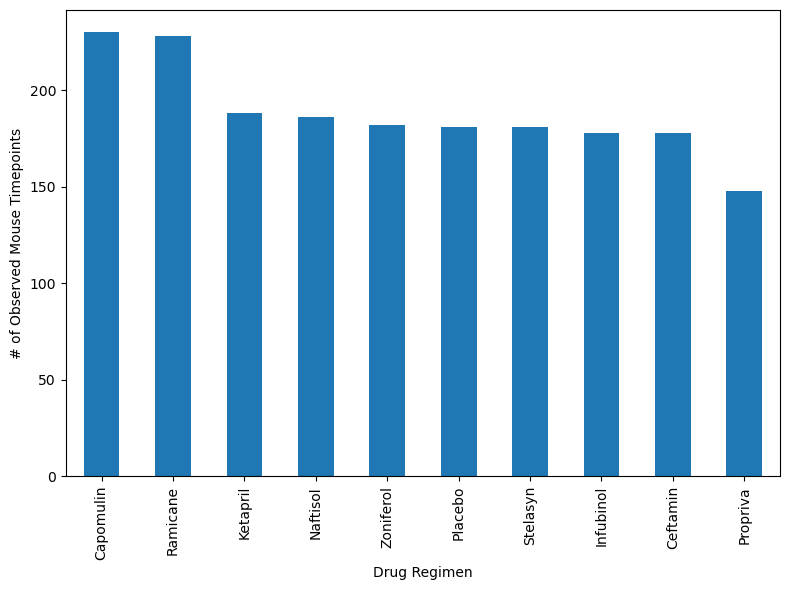

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
row_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate the bar plot using Pandas
row_counts.plot(kind='bar', figsize=(8, 6))

# Add labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

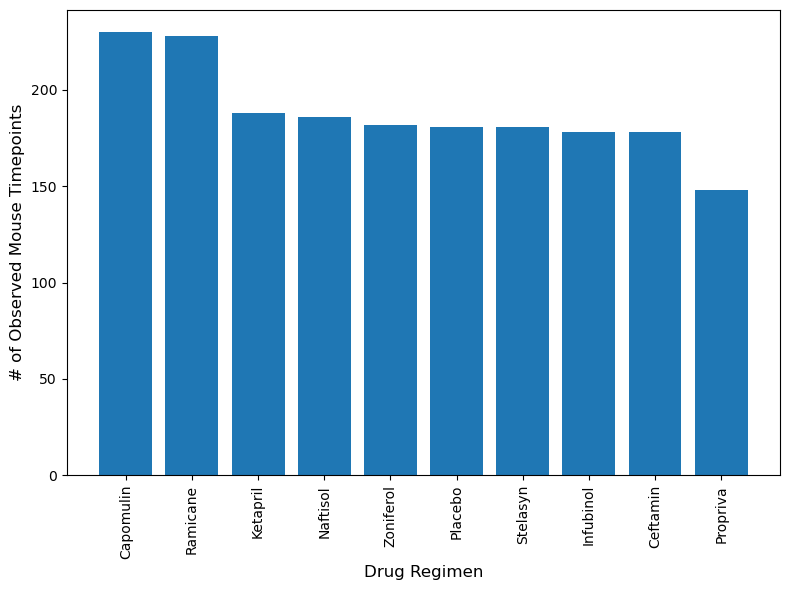

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
row_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate the bar plot using pyplot
plt.figure(figsize=(8, 6))
plt.bar(row_counts.index, row_counts.values)

# Add title and labels
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Adjust layout to fit everything
plt.tight_layout()

# Display the plot
plt.show()

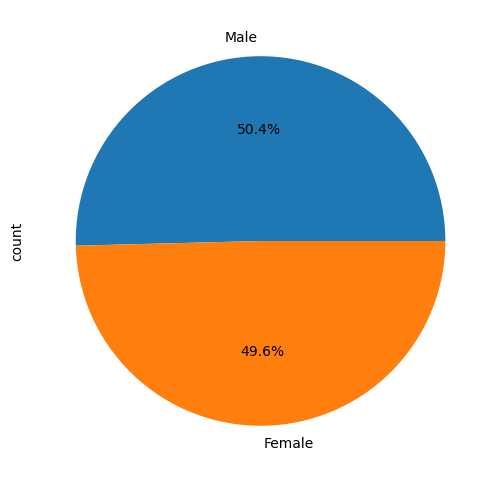

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data.groupby('Mouse ID')['Sex'].first().value_counts()

# Make the pie chart
unique_mice_gender.plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    labels=['Male', 'Female']
)

plt.show()

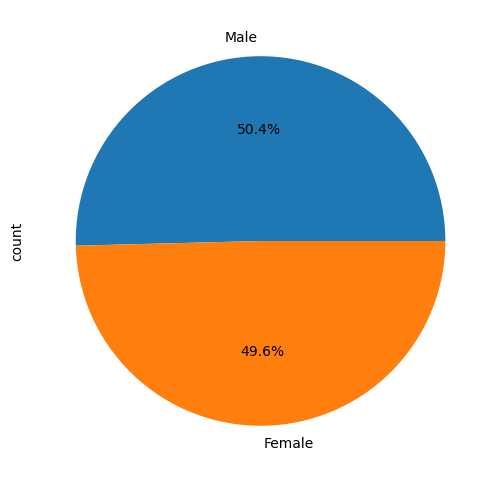

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data.groupby('Mouse ID')['Sex'].first().value_counts()

# Make the pie chart
unique_mice_gender.plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    labels=['Male', 'Female']
)

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

tumor_vol_subsets = {}

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_regimens:
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

    # add subset
    tumor_vol_subsets[treatment] = tumor_volumes

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Calculate the outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 800x600 with 0 Axes>

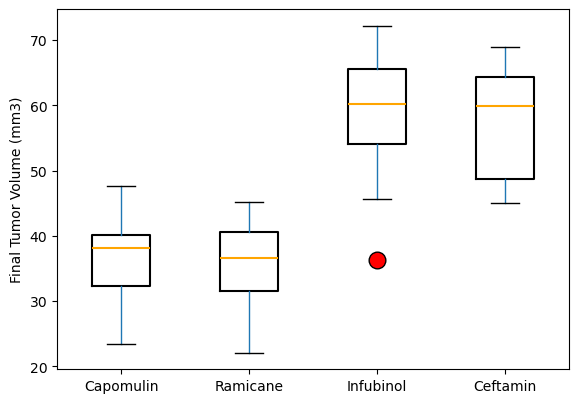

In [34]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))

#Categorize the drugs
final_tumor_volume['Drug Regimen'] = pd.Categorical(final_tumor_volume['Drug Regimen'], categories=treatment_regimens, ordered=True)

# Customizing the box plot
boxprops = dict(linestyle='-', linewidth=1.5, color='black')
flierprops = dict(marker='o', markerfacecolor='red', markersize=12)
medianprops = dict(linestyle='-', linewidth=1.5, color='orange')

# Create the box plot
final_tumor_volume.boxplot(
    column='Tumor Volume (mm3)', 
    by='Drug Regimen', 
    grid=False, 
    patch_artist=False,  # Keep boxes unfilled
    boxprops=boxprops, 
    flierprops=flierprops, 
    medianprops=medianprops
)

# Customize the plot
plt.title("")
plt.suptitle("")  # Remove the automatic Pandas-generated title
plt.xlabel("")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

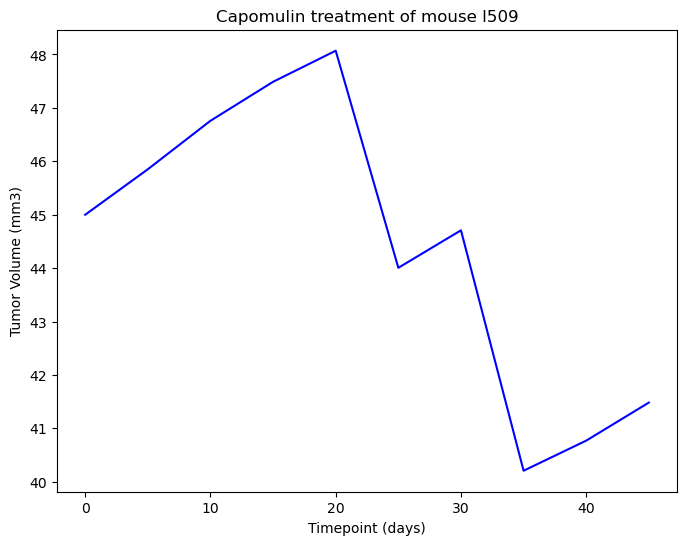

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the dataset for this specific mouse
mouse_id = 'l509'
mouse_data = cleaned_data[cleaned_data['Mouse ID'] == mouse_id]

# Generate the line plot
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='blue')

# Customize the plot
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(0, mouse_data['Timepoint'].max() + 1, 10))
plt.grid(False)

# Display the plot
plt.show()

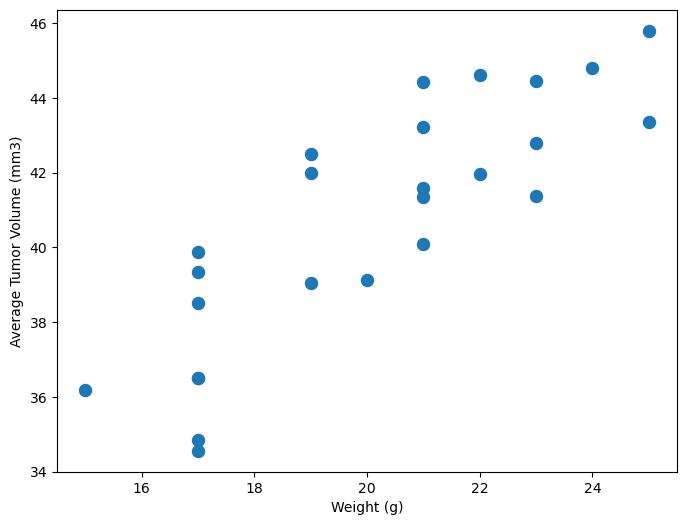

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the dataset for only the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with mouse metadata to get weight
capomulin_weight_data = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')

plt.figure(figsize=(8, 6))
plt.scatter(capomulin_weight_data['Weight (g)'], capomulin_weight_data['Tumor Volume (mm3)'], s=75)

# Customize the plot
plt.title("")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(False)

# Display the plot
plt.show()

## Correlation and Regression

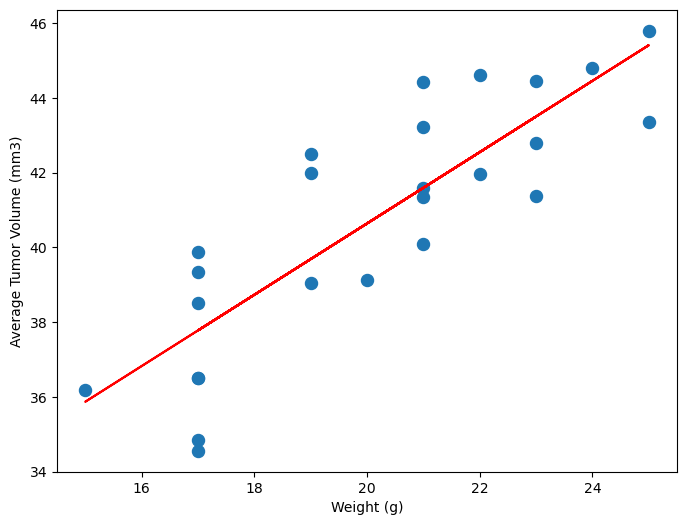

Correlation Coefficient: 0.84
Linear Regression Equation: y = 0.95x + 21.55


In [68]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_weight_data['Weight (g)'], capomulin_weight_data['Tumor Volume (mm3)'])[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(
    capomulin_weight_data['Weight (g)'], capomulin_weight_data['Tumor Volume (mm3)'])

# Generate regression line values
regression_line = slope * capomulin_weight_data['Weight (g)'] + intercept

# Generate scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_weight_data['Weight (g)'], capomulin_weight_data['Tumor Volume (mm3)'], 
            s=75)
plt.plot(capomulin_weight_data['Weight (g)'], regression_line, color='red', 
         label=f"Linear Fit (r={correlation:.2f})")

# Customize the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()

# Print correlation coefficient and regression equation
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")